<a href="https://colab.research.google.com/github/julihocc/ulsaPye/blob/master/Actividad_102%2C_Equipo_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Actividad 102 de la Materia Modelos Avanzados en Ciencia de Datos
#### Desarrollado por
- Jorge Daniel González Arostico 
- Adán Ramírez Hernández

#### Instrucciones

1.	Consulta Eiselt, H. A., Sandblom, C. (2010). Operations Research: A Model-Based Approach. Germany: Springer Berlin Heidelberg, sección 5.3.
2.	Replantea el problema 3 del libro Eiselt & Samblont, capítulo 5, como un problema de flujo con costo mínimo.
3.	Resuelve el problema utilizando pywrapgraph.SimpleMinCostFlow() de Google OR Tools.
4.	Verifica si tu respuesta es equivalente a la que da el libro. En caso de que no sea así, discute las posibles explicaciones.
5.	Transcribe tu solución en DataLore y comparte el enlace al trabajo de tu equipo.



### **Problema 3: Algoritmo de Dijkstra, la ruta más corta**

  Considere el grafo formada por seis nodos y 12 arcos conectados como se muestra en la siguiente figura. Determine la ruta más corta que va del nodo $n_s$ a todos los otros nodos.


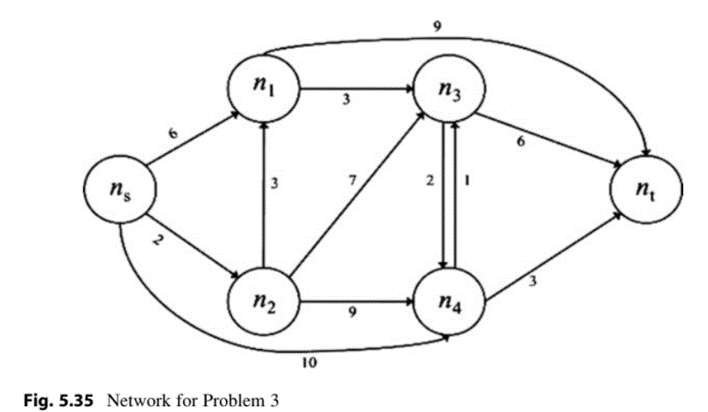

### **Descripción**

Se observa que la red esta compuesta por arcos cuya direccion esta definida por una flecha, por ejemplo el nodo $n_s$ tiene una dirección a los nodos $n_1$, $n_2$ y $n_4$, ninguno de estos nodos tiene retorno al nodo $n_s$. Sin embargo los nodos $n_3$ y $n_4$ tienen caminos de regreso, con una distancia diferente. Cuando se requiere ir del nodo $n_3$ a $n_4$ se tiene una distancia de 2 unidades, ir del nodo $n_4$ -> $n_3$ el costo o la distancia es menor, correspondiente a una unidad. Esto se podría interpetrar como las avenidas de una cuidad en la que transitan vehìculos, sabemos que hay caminos que nos llevan de un lado a otro pero no podemos regresar por ese mismo camino.

#### Algoritmo de Dijkstra

Dado un grafo a cuyos arcos se han asociado una serie de pesos, se define el camino de coste mínimo de un vértice $u$ a otro $v$, como el camino donde la suma de los pesos de los arcos que lo forman es la más baja entre las de todos los caminos posibles de $u$ a $v$

- Sea V un conjunto de vértices de un grafo.
- Sea C una matriz de costos de las aristas del grafo, donde en C[u,v] se almacena el costo de la arista entre u y v.
- Sea S un conjunto que contendrá los vértices para los cuales ya se tiene determinado el camino mínimo.
- Sea D un arreglo unidimensional tal que D[v] es el costo del camino mínimo del vértice origen al vértice v.
- Sea P un arreglo unidimensional tal que P[v] es el vértice predecesor de v en el camino mínimo que se tiene construido.
- - Sea vinicial el vértice origen. Recordar que el Algoritmo Dijkstra determina los caminos mínimos que existen partiendo de un vértice origen al resto de los vértices.

La siguiente tablamuestra el proceso que se llevo acabo por el algoritmo para determinar el camino más corto.

El cual tiene como resultado la siguiente ruta según Eiselt, H. A., Sandblom, C. (2010):

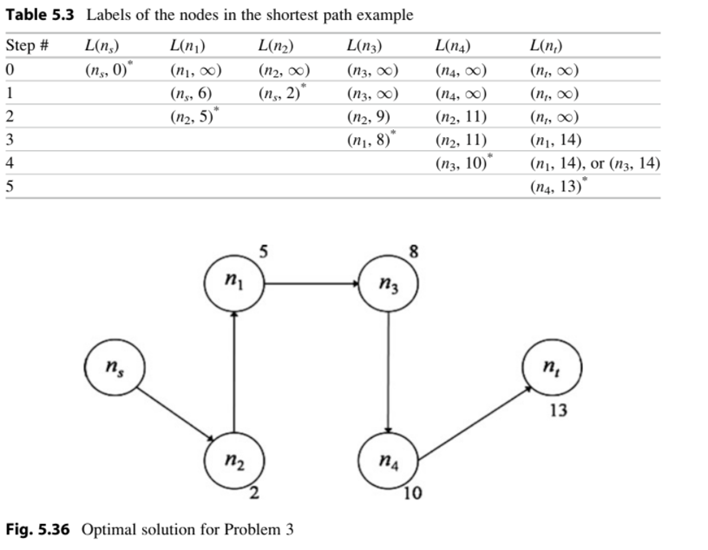

In [1]:
pip install future


In [2]:
pip install ortools

     |████████████████████████████████| 14.4 MB 89 kB/s 


In [3]:
#Se importan las librerias a utilizar
# Importar la librería de Google plus OR-Tools 
from __future__ import print_function 
from ortools.graph import pywrapgraph

In [4]:
nodos_fuente  = [ 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4] 
nodos_destino = [ 1, 2, 4, 3, 5, 1, 3, 4, 4, 5, 5] 
habilidades   = [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 
distancia     = [ 6, 2, 10, 3, 9, 3, 7, 9, 2, 6, 3] 
abastecimientos = [1, 0, 0, 0, 0, -1]

### Flujo de Costo Mínimo

El problema de flujo de costo mínimo ( MCFP ) es un problema de optimización y decisión para encontrar la forma más barata posible de enviar una cierta cantidad de flujo a través de una red de flujo . Una aplicación típica de este problema implica encontrar la mejor ruta de entrega desde una fábrica hasta un almacén donde la red de carreteras tiene cierta capacidad y costo asociado. El problema de flujo de costo mínimo es uno de los más fundamentales entre todos los problemas de flujo y circulación porque la mayoría de los otros problemas de este tipo pueden plantearse como un problema de flujo de costo mínimo y también pueden resolverse de manera eficiente utilizando el algoritmo de red simplex . Problema de flujo de costo mínimo

#### Implementación en Python

De la librería ``Pywrapgraph`` emplearemos el módulo ``SimpleMinCostFlow`` que contiene la implementación de algoritmo de Flujo de Costo Minimo, que será la herramientra que utilizaremos para dar solución el problema descrito anteriormente. Esta herramienta es fácil de instanciar y ejecutar, puesto que los hiperparametros es la descripcion de la red en una matriz y vectores suficientes y necesarios para el algoritmo.

In [5]:
# Crea una instancia para el solucionador 
min_cost_flow = pywrapgraph.SimpleMinCostFlow() 
 
# Define cada arco del inconveniente 
for i in range(0, len(nodos_fuente)): 
  min_cost_flow.AddArcWithCapacityAndUnitCost(nodos_fuente[i], nodos_destino[i], 
                                              habilidades[i], distancia[i]) 
 
# Define los abastecimientos para cada nodo. 
for i in range(0, len(abastecimientos)): 
  min_cost_flow.SetNodeSupply(i, abastecimientos[i]) 

In [6]:
# Halla el valor mínimo entre el nodo 0 y el nodo 8 
if min_cost_flow.Solve() == min_cost_flow.OPTIMAL: 
  print('Distancia mínima:', min_cost_flow.OptimalCost()) 
  print('') 
  print(' Arco Fluído / Aptitud Distancia') 
  for i in range(min_cost_flow.NumArcs()): 
    cost = min_cost_flow.Flow(i) * min_cost_flow.UnitCost(i) 
    print('%1s -> %1s %3s / %3s %3s' % ( 
        min_cost_flow.Tail(i), 
        min_cost_flow.Head(i), 
        min_cost_flow.Flow(i), 
        min_cost_flow.Capacity(i), 
        cost)) 
else: 
  print('Hubo un inconveniente con la entrada de fluído de distancia mínima.') 

Distancia mínima: 13

 Arco Fluído / Aptitud Distancia
0 -> 1   0 /   1   0
0 -> 2   1 /   1   2
0 -> 4   0 /   1   0
1 -> 3   1 /   1   3
1 -> 5   0 /   1   0
2 -> 1   1 /   1   3
2 -> 3   0 /   1   0
2 -> 4   0 /   1   0
3 -> 4   1 /   1   2
3 -> 5   0 /   1   0
4 -> 5   1 /   1   3


Se obtiene como resultado un grafo que inicia de $n_s$ a $n_2$ después al nodo $n_1$ que posterior se conecta a $n_3$, asi como al nodo $n_4$  y finaliza en $n_t$.

### Conclusión

Hemos empleado el algoritmo de Flujo de Costo Minimo como herramienta para obtener la trayectoriacon distancia minima que va del nodo $n_s$ al nodo $n_t$. El resultado proporcionado en el libro Operations research [1] se obtuvo empleando el algoritmo de Ruta más corta de Dijkstra, que en escencia visita y calcula las distancias totales las todas las posibles rutas en el grafo en cuestionm, para al finalmente brindar una trayectoria de las posibles rutas más cortas. Estos algoritmos comparten caractéristicas similares cuando particularridades y codiciones iniciales de un problema permiten ser resueltos por uno u otro algoritmo. Es por ello la solución de nuestro problema puede ser obtenida por el algoritmo de Flujo de costo minímo.

Referencias:

[1] Eiselt, H. A., & Sandblom, C. L. (2012). Operations research: A model-based approach. Springer Science & Business Media.

[2] Industrial Mechanics Club (2021). Shortest patg problem in Google plus OR-Tools. Disponible en la web: https://industrialmechanics.club/guides-and-tutorials/shortest-path-problem-in-google-plus-or-tools/